In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# !pip install xgboost

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [22]:
# Code starts here

dataset = pd.read_csv("./train.csv")
dataset.head()
# Code ends here.

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2524,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,13295,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,4312,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,10656,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,868,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [23]:
dataset.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.0,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000,9072.000000,9072.000000,9072.0,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000
mean,7535.450838,2749.531415,156.480930,16.529872,226.781966,51.213624,1717.954806,212.691027,219.030423,135.119378,1520.420525,0.239528,0.032959,0.420084,0.307429,0.025022,0.040675,0.061728,0.055004,0.010913,0.045635,0.0,0.000110,0.000551,0.138117,0.026675,0.01455,0.033069,0.011243,0.0,0.007716,0.040344,0.004740,0.003086,0.009700,0.001102,0.022707,0.049824,0.015322,0.000110,0.003968,0.000882,0.000551,0.086530,0.048721,0.020944,0.045635,0.041005,0.001653,0.006834,0.000551,0.002425,0.048391,0.044312,0.029652,4.00000
std,4369.975238,417.236330,109.411024,8.495603,208.875071,61.621329,1322.812625,30.720175,22.885044,46.225735,1121.444963,0.426819,0.178538,0.493599,0.461454,0.156201,0.197546,0.240675,0.228001,0.103898,0.208704,0.0,0.010499,0.023471,0.345042,0.161142,0.11975,0.178826,0.105443,0.0,0.087506,0.196775,0.068687,0.055473,0.098016,0.033184,0.148977,0.217592,0.122836,0.010499,0.062872,0.029684,0.023471,0.281161,0.215297,0.143203,0.208704,0.198313,0.040631,0.082391,0.023471,0.049188,0.214602,0.205799,0.169634,2.00011
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-123.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,3739.500000,2375.750000,65.000000,10.000000,67.000000,5.000000,765.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
50%,7551.500000,2755.000000,125.000000,15.000000,180.000000,32.000000,1321.000000,220.000000,223.000000,138.000000,1252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
75%,11325

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  9072 non-null   int64
 1   Elevation                           9072 non-null   int64
 2   Aspect                              9072 non-null   int64
 3   Slope                               9072 non-null   int64
 4   Horizontal_Distance_To_Hydrology    9072 non-null   int64
 5   Vertical_Distance_To_Hydrology      9072 non-null   int64
 6   Horizontal_Distance_To_Roadways     9072 non-null   int64
 7   Hillshade_9am                       9072 non-null   int64
 8   Hillshade_Noon                      9072 non-null   int64
 9   Hillshade_3pm                       9072 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  9072 non-null   int64
 11  Wilderness_Area1                    9072 non-null   int64
 12  Wilder

In [25]:
dataset.drop(['Id'],axis = 1, inplace = True)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           9072 non-null   int64
 1   Aspect                              9072 non-null   int64
 2   Slope                               9072 non-null   int64
 3   Horizontal_Distance_To_Hydrology    9072 non-null   int64
 4   Vertical_Distance_To_Hydrology      9072 non-null   int64
 5   Horizontal_Distance_To_Roadways     9072 non-null   int64
 6   Hillshade_9am                       9072 non-null   int64
 7   Hillshade_Noon                      9072 non-null   int64
 8   Hillshade_3pm                       9072 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  9072 non-null   int64
 10  Wilderness_Area1                    9072 non-null   int64
 11  Wilderness_Area2                    9072 non-null   int64
 12  Wilder

### EDA & Data Preprocessing

- The target is the only categorical feature consisting of 7 classes and all the other features are continuous. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots. 

In [27]:
#names of all the attributes 
cols = dataset.columns

#number of attributes (exclude target)
size = len(cols) - 1

#x-axis has target attribute to distinguish between classes
x = cols[size]
print(x)

#y-axis shows values of an attribute
y = cols[0:size]
print(y)

Cover_Type
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', '

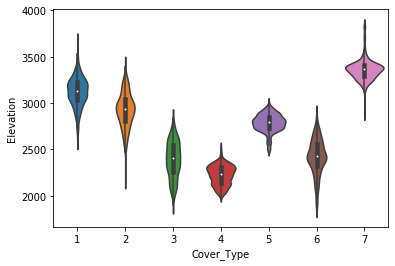

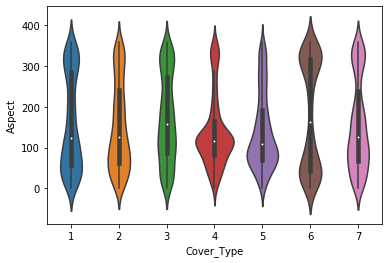

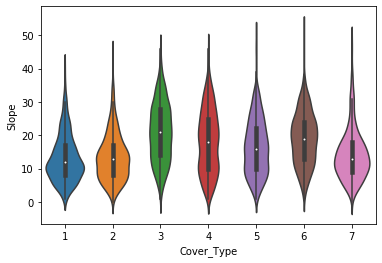

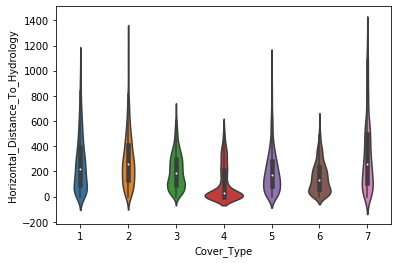

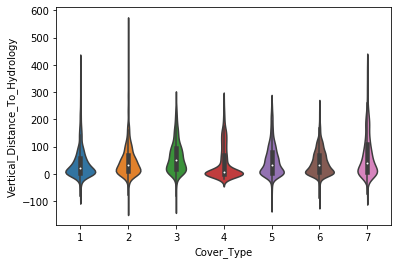

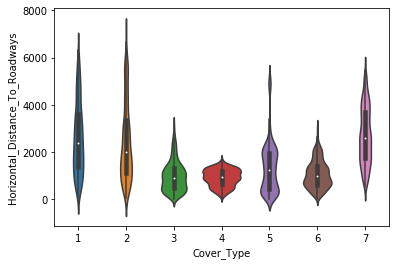

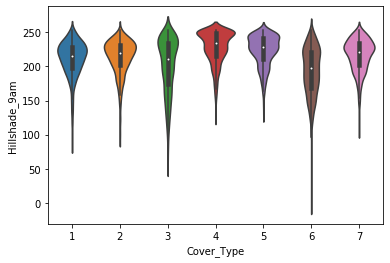

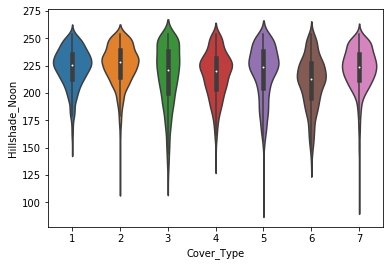

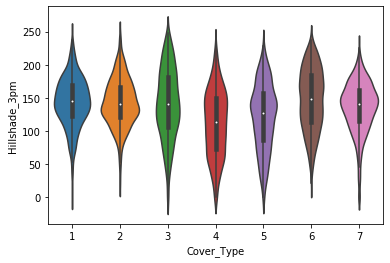

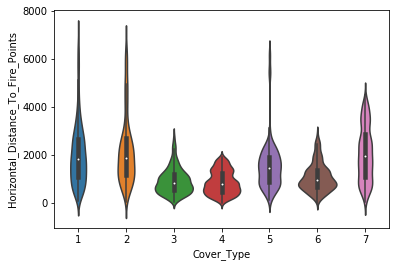

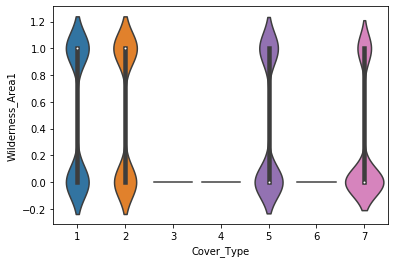

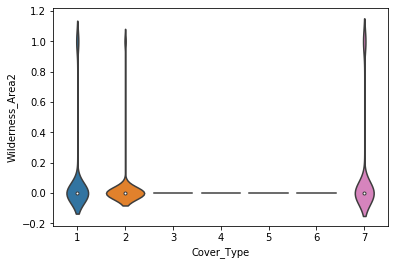

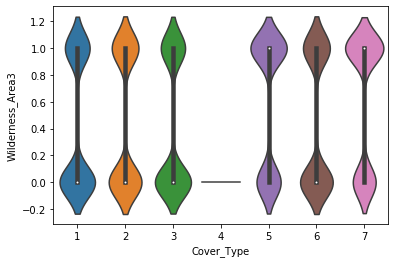

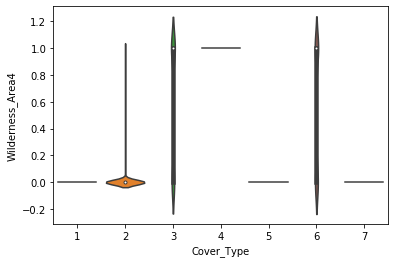

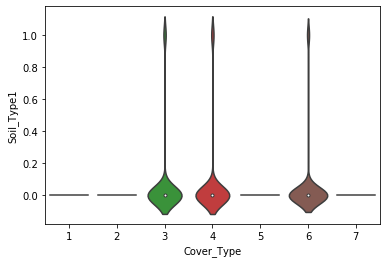

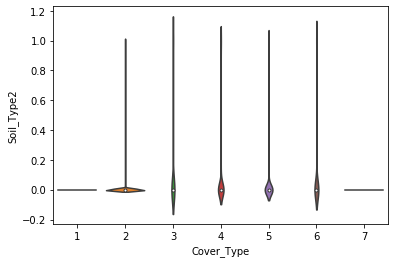

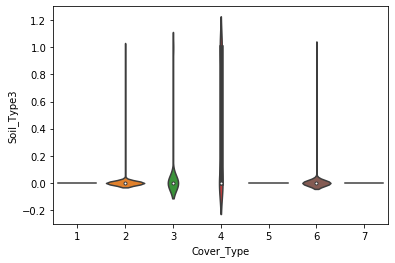

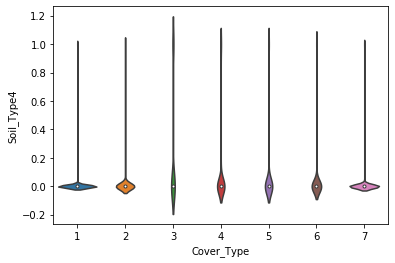

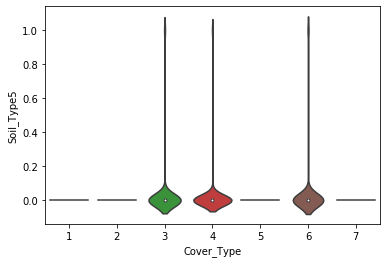

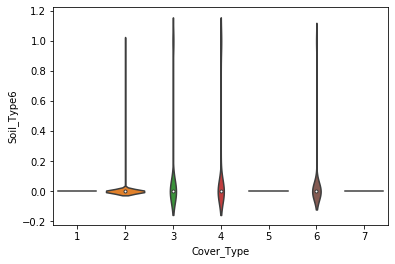

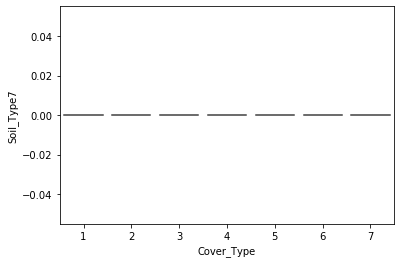

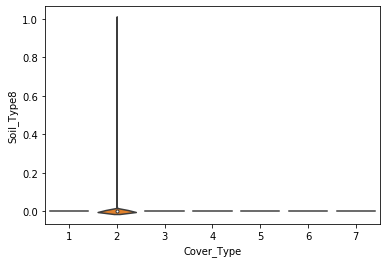

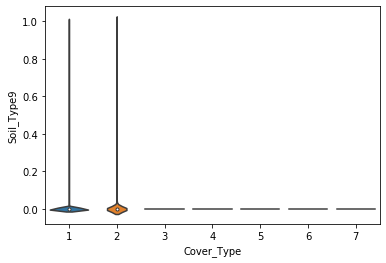

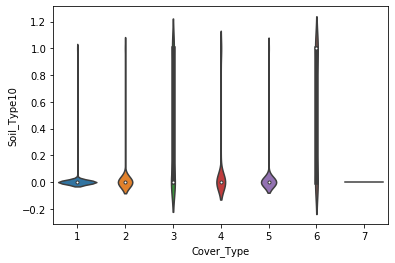

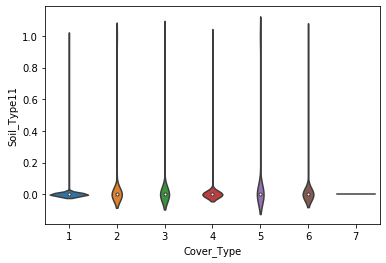

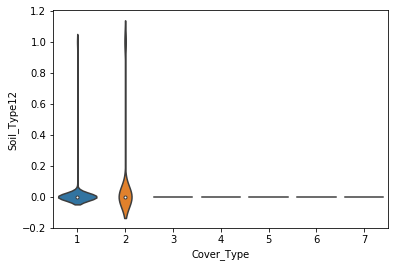

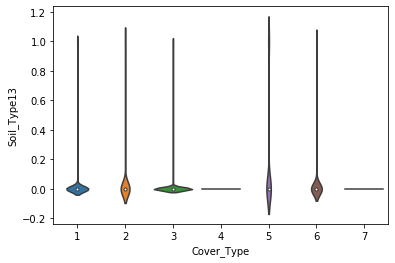

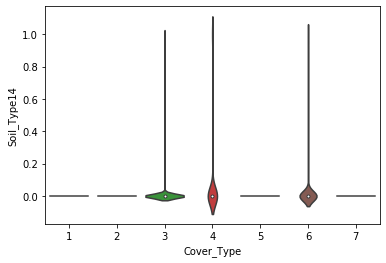

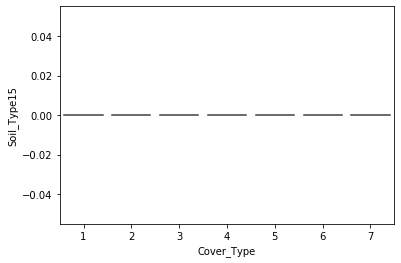

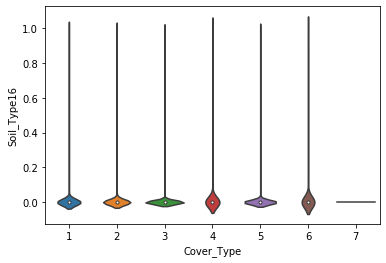

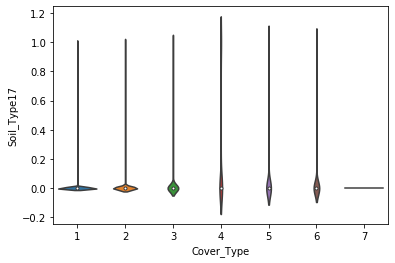

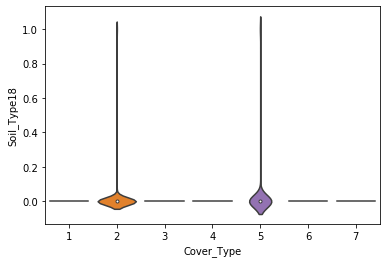

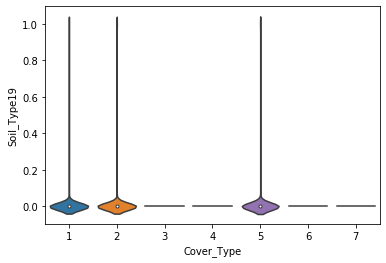

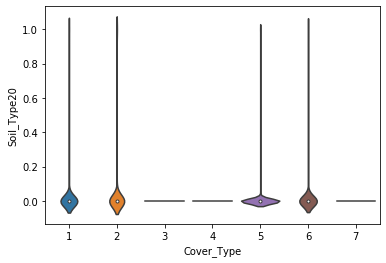

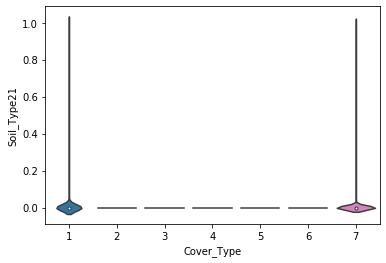

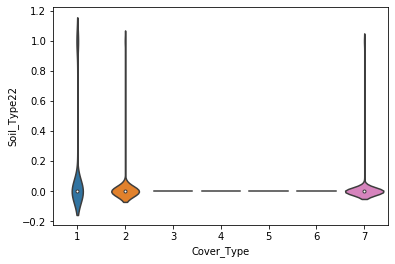

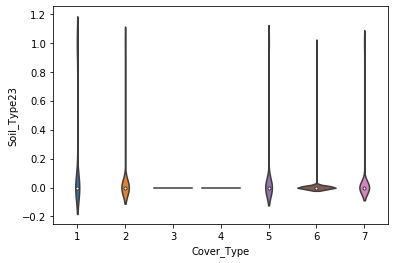

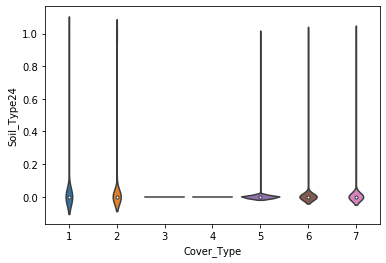

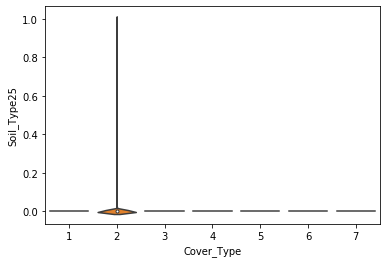

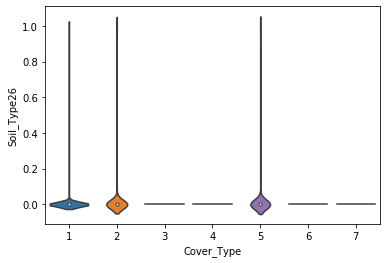

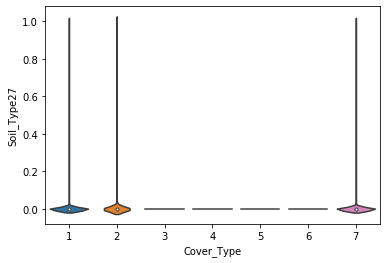

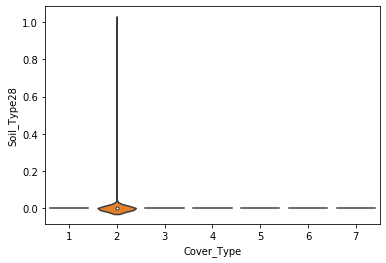

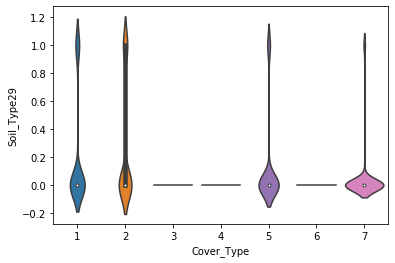

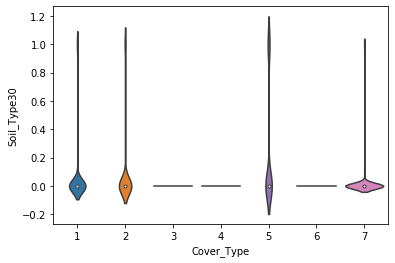

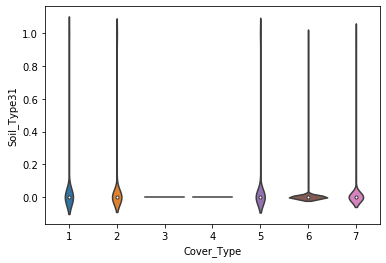

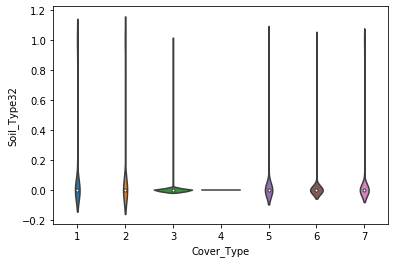

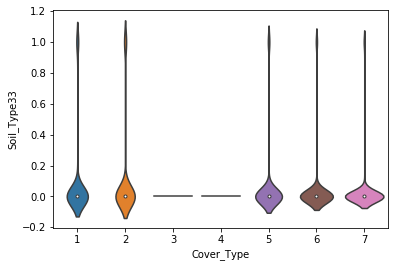

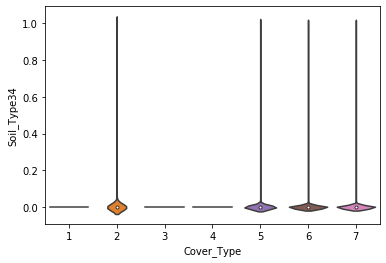

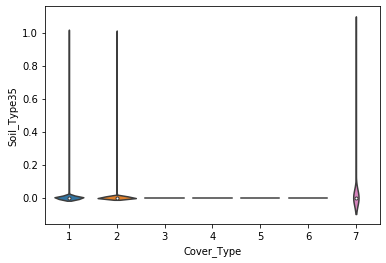

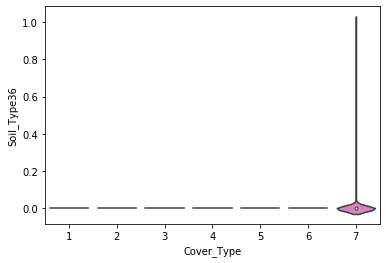

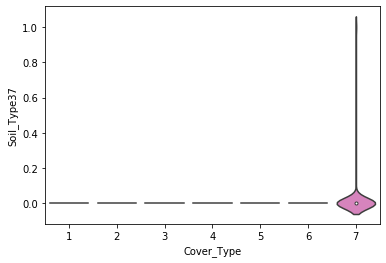

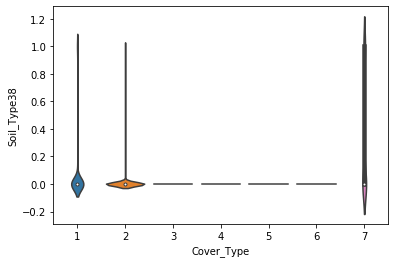

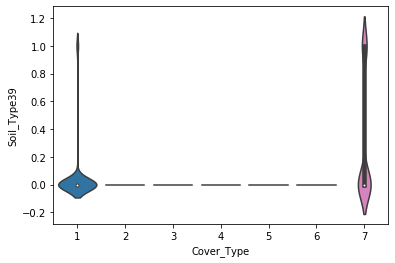

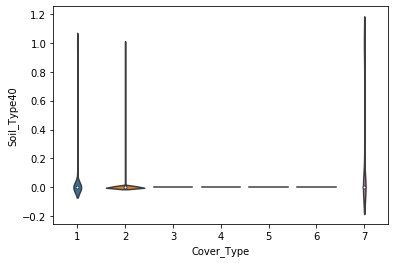

In [28]:
#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=dataset,x=x,y=y[i])  
    plt.show()

**Insights**

Elevation  has a separate distribution for most classes. Highly correlated with the target and hence an important attribute Aspect contains a couple of normal distribution for several classes Horizontal distance to road and hydrology have similar distribution Lots of 0s in vertical distance to hydrology Wilderness_Area3 gives no class distinction. As values are not present, others gives some scope to distinguish Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes

In [29]:

threshold = 0.5

# no. of features considered after ignoring categorical variables
num_features = 10

# create a subset of dataframe with only 'num_features'
subset_train = dataset.iloc[:,:num_features]
cols = subset_train.columns
print(cols)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')


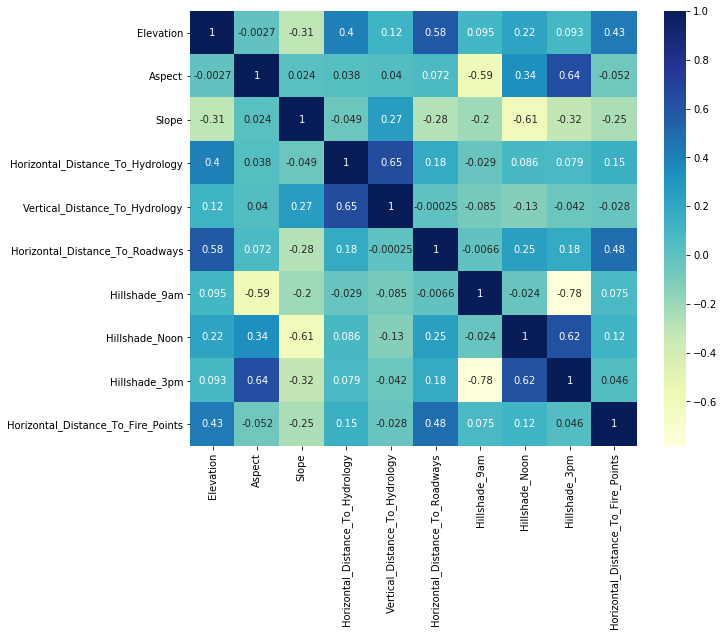

In [30]:
#Calculate the pearson co-efficient for all possible combinations
data_corr = subset_train.corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(data_corr, annot=True, cmap="YlGnBu")

In [31]:
# Set the threshold and search for pairs which are having correlation level above threshold
corr_var_list = []

for i in range(1, num_features):
    for j in range(i):
        if((abs(data_corr.iloc[i,j]) > threshold) & (abs(data_corr.iloc[i,j]) < 1)):
            corr_var_list.append([data_corr.iloc[i,j], i, j])

# Sort the list showing higher ones first 
s_corr_list = sorted(corr_var_list ,key = lambda x:abs(x[0]))

#Print correlations and column names
for corr_value, i, j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],corr_value))

Horizontal_Distance_To_Roadways and Elevation = 0.58
Hillshade_9am and Aspect = -0.59
Hillshade_Noon and Slope = -0.61
Hillshade_3pm and Hillshade_Noon = 0.62
Hillshade_3pm and Aspect = 0.64
Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology = 0.65
Hillshade_3pm and Hillshade_9am = -0.78


In [32]:
# Identify the unnecessary columns and remove it 
dataset.drop(columns=['Soil_Type7', 'Soil_Type15'], inplace=True)

In [39]:


X = dataset.drop(['Cover_Type'],axis=1)
Y = dataset['Cover_Type'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [40]:
#Apply transform only for non-categorical data
std_model = StandardScaler()
X_train_temp = std_model.fit_transform(X_train.iloc[:,:10])
X_test_temp = std_model.fit_transform(X_test.iloc[:,:10])

#Concatenate non-categorical data and categorical
X_train1 = np.concatenate((X_train_temp, X_train.iloc[:,10:]), axis = 1)
X_test1 = np.concatenate((X_test_temp, X_test.iloc[:,10:]), axis = 1)

print(type(X_train1))

scaled_features_train_df = pd.DataFrame(X_train1, index = X_train.index, columns = X_train.columns)
scaled_features_test_df = pd.DataFrame(X_test1, index = X_test.index, columns = X_test.columns)

<class 'numpy.ndarray'>


In [36]:
scaled_features_train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
1039,1.743639,-1.340076,0.170968,0.700872,2.405610,-0.408454,-0.512546,-0.784086,0.041924,0.168753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4848,-0.535976,-0.945209,-0.297430,0.447207,0.310992,-0.520424,0.463122,-0.436732,-0.498936,-0.193095,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6858,0.526720,1.736215,-0.531628,-0.955131,-0.776911,-1.055138,-0.545068,0.084299,0.604417,-0.603915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1870,-0.658873,1.662751,-0.765827,-0.505234,-0.630775,-0.269824,-0.512546,0.257976,0.690955,-0.600288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2913,-1.099855,-0.541159,0.053868,-0.691893,-0.452164,-1.050568,1.081045,-0.306474,-0.996526,0.087133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
scaled_features_test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
447,-0.837691,0.954652,-0.179378,-0.904140,-0.605011,-0.801328,-0.995306,1.205858,1.443164,-0.471755,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7195,0.000321,0.657080,2.093411,0.453688,0.708360,1.063082,-2.072740,1.250431,1.789304,0.023064,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6473,0.701418,-0.352861,0.897206,-0.846564,-0.832013,-0.810946,1.290160,-0.309611,-1.347587,-0.664232,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400,1.001213,0.179162,-1.016721,-0.640251,-0.605011,-0.422527,0.375973,1.161286,0.426379,-0.983608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5281,-0.873100,-0.298757,1.495309,0.391314,0.400285,-0.486154,1.322809,-0.621619,-1.672093,-0.776653,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#Logistic regression with GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
import sklearn.metrics as metrics


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here

# instantiate logistic regression model
lr=LogisticRegression(random_state=9)
lr.fit(X_train,y_train)
# grid search on logistic regression

grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_test)
accuracy=grid.score(X_test,y_test)
print(accuracy)

print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred))


0.5013227513227513
Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           1       0.43      0.36      0.39       304
           2       0.48      0.44      0.46       310
           3       0.42      0.28      0.34       331
           4       0.70      0.77      0.73       342
           5       0.46      0.50      0.48       331
           6       0.33      0.40      0.37       319
           7       0.62      0.72      0.67       331

    accuracy                           0.50      2268
   macro avg       0.49      0.50      0.49      2268
weighted avg       0.50      0.50      0.49      2268



In [49]:
#Random forest with GridSearchCV
parameters = {'n_estimators':[500]}
# instantiate random forest model
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

# grid search on random forest classifier 

grid_rf = GridSearchCV(estimator=rf, param_grid=parameters)
grid_rf.fit(X_train, y_train)

# make predictions 
y_pred_rf = grid_rf.predict(X_test)
accuracy=grid.score(X_test,y_test)
print(accuracy)
print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred))




0.5013227513227513
Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           1       0.43      0.36      0.39       304
           2       0.48      0.44      0.46       310
           3       0.42      0.28      0.34       331
           4       0.70      0.77      0.73       342
           5       0.46      0.50      0.48       331
           6       0.33      0.40      0.37       319
           7       0.62      0.72      0.67       331

    accuracy                           0.50      2268
   macro avg       0.49      0.50      0.49      2268
weighted avg       0.50      0.50      0.49      2268



In [50]:
from imblearn.over_sampling import SMOTE

# Code starts here
smote = SMOTE(random_state=0)
#Fitting and transforming data points
X_sample, y_sample = smote.fit_sample(X_train, y_train)


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_smote=RandomForestClassifier(random_state=0)
rf_smote.fit(X_sample,y_sample)
y_pred_smote= rf_smote.predict(X_test)
accuracy_smote= rf_smote.score(X_test,y_test)


#plots


print("acuracy is :",accuracy_smote)
print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred))


acuracy is : 0.8403880070546738
Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           1       0.43      0.36      0.39       304
           2       0.48      0.44      0.46       310
           3       0.42      0.28      0.34       331
           4       0.70      0.77      0.73       342
           5       0.46      0.50      0.48       331
           6       0.33      0.40      0.37       319
           7       0.62      0.72      0.67       331

    accuracy                           0.50      2268
   macro avg       0.49      0.50      0.49      2268
weighted avg       0.50      0.50      0.49      2268



### Feature Selection and Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different feature selection techniques like wrapper methods, PCA and try using hyperparameter tuning to find the parameters that give the best accuracy.

In [3]:
# Code Starts here








# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [52]:
test_data=pd.read_csv('test.csv')

In [53]:
test_data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,6376,2707,28,5,240,8,30,218,230,148,708,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8962,3401,161,15,361,45,2881,234,242,135,1801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7122,2789,336,20,256,67,1731,172,209,174,1091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,931,2942,350,9,242,33,5032,203,224,160,1838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3678,2311,22,23,127,48,1149,199,184,113,819,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,3982,2199,188,24,0,0,932,215,249,155,408,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6044,8524,2584,345,11,30,4,1667,199,223,163,2892,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6045,4332,2241,162,5,0,0,638,224,241,151,569,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6046,4935,2283,101,31,210,86,680,253,182,32,1614,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# Identify the unnecessary columns and remove it 
test_data.drop(columns=['Id','Soil_Type7', 'Soil_Type15'], inplace=True)

In [55]:
test_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2707,28,5,240,8,30,218,230,148,708,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3401,161,15,361,45,2881,234,242,135,1801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2789,336,20,256,67,1731,172,209,174,1091,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2942,350,9,242,33,5032,203,224,160,1838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2311,22,23,127,48,1149,199,184,113,819,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,2199,188,24,0,0,932,215,249,155,408,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6044,2584,345,11,30,4,1667,199,223,163,2892,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6045,2241,162,5,0,0,638,224,241,151,569,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6046,2283,101,31,210,86,680,253,182,32,1614,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
test=pd.read_csv('test.csv')

In [57]:
id_ = test['Id']

In [61]:
# Code starts here
# Predict on the test data
y_pred_rf_smote = rf_smote.predict(test_data)

print(y_pred_rf_smote)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Cover_Type':y_pred_rf_smote})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sub_rf_smot.csv',index=False)
# Code ends here

[5 7 5 ... 4 4 3]


In [62]:
sample_submission.Cover_Type.value_counts()

4    916
7    912
5    904
6    893
1    857
3    848
2    718
Name: Cover_Type, dtype: int64